In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

import util

FOLDER = "/Users/brendan/Documents/projects/trails_project/data/series/"

SIZE = 10000
STEPS = 40000

datafiles = [
    "SVD|2025-06-24/data.json"
]

In [2]:
dfs = [
    util.load_data(FOLDER + datafile) for datafile in datafiles
]
df = pd.concat(dfs)
util.describe(df)
df.columns

ratios: [100.0]
patch recovery: [0.001 0.0005]
max costs: [2.0]
boundary conditions: ['PERIODIC']
num locations: [10]
random walker seeds: 64
random locations seeds: 1
patch recovery logic: ['LINEAR']
steps: 40000


Index(['averageTravelCost', 'averageTravelLength', 'totalImprovement',
       'thresholdImprovement', 'steps', 'paths', 'weightedHeadings',
       'avgHeading', 'avgSquareHeading', 'patches',
       'settings.patchImprovement', 'settings.patchRecovery',
       'settings.maxCost', 'settings.boundaryConditions',
       'settings.numLocations', 'settings.randomSeedWalkers',
       'settings.randomSeedLocations', 'settings.recoveryLogic',
       'settings.improvementLogic', 'ratio'],
      dtype='object')

In [4]:
recoveries = [0.001, 0.0005]
steps = [5000, 10000, 20000, 40000]
numLocations = [10]
seedLocations = [1]
boundaryConditions = ["PERIODIC"]



i = 0
for numLocation in numLocations:
    for seedLocation in seedLocations:
        for boundaryCondition in boundaryConditions:
            for recovery in recoveries:
                for step in steps:
                    _all = df[
                        (df["settings.patchRecovery"] == recovery) &
                        # (df["settings.improvementLogic"] == "LINEAR") &
                        (df["settings.numLocations"] == numLocation) &
                        (df["settings.randomSeedLocations"] == seedLocation) &
                        (df["settings.boundaryConditions"] == boundaryCondition)
                    ]

                    U, S, Vh = util.svd(_all, step, plot=False, dynamics=False)
                    s = S**2/sum(S**2)
    
                    print(i, s[0], " --------- ", recovery, numLocation, seedLocation, boundaryCondition, step, (S[0] / sum(S)))
                    i += 1


0 0.6066582508467584  ---------  0.001 10 1 PERIODIC 5000 0.15813753388354
1 0.5860955568842364  ---------  0.001 10 1 PERIODIC 10000 0.15295018503549962
2 0.5903361021144258  ---------  0.001 10 1 PERIODIC 20000 0.1558051515123401
3 0.6101082312804541  ---------  0.001 10 1 PERIODIC 40000 0.16345255240977596
4 0.7436567351791019  ---------  0.0005 10 1 PERIODIC 5000 0.2025030419534757
5 0.720790024512717  ---------  0.0005 10 1 PERIODIC 10000 0.19810625393449158
6 0.6898490814051923  ---------  0.0005 10 1 PERIODIC 20000 0.18846655187931122
7 0.6801629814338213  ---------  0.0005 10 1 PERIODIC 40000 0.18566181146594105


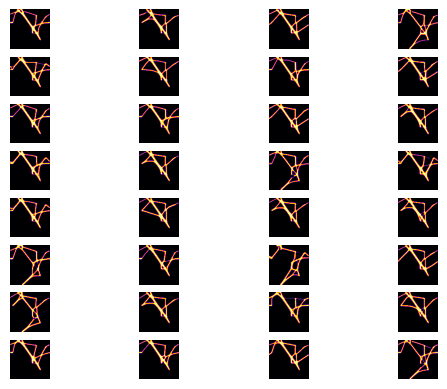

In [6]:
util.plot_patches(_all[_all["steps"] == 40000])

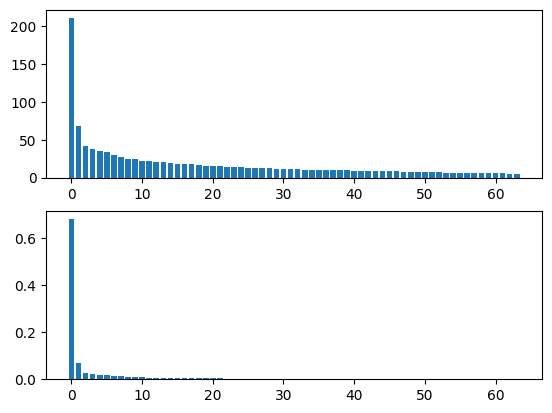

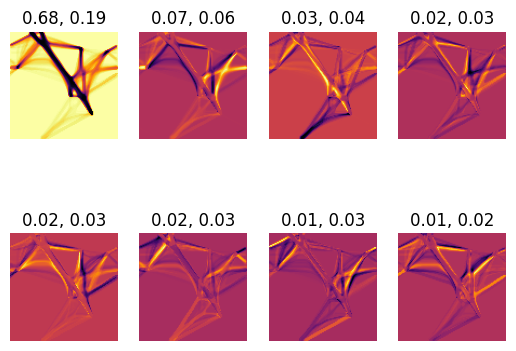

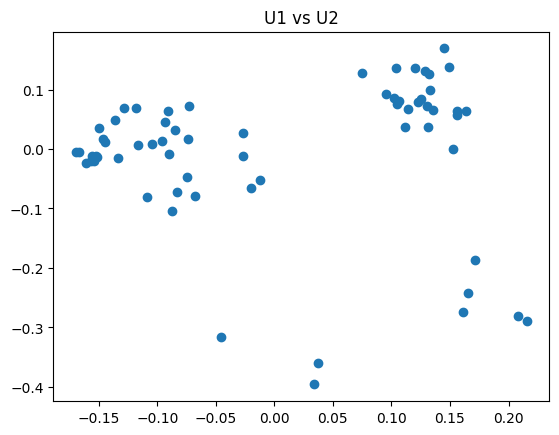

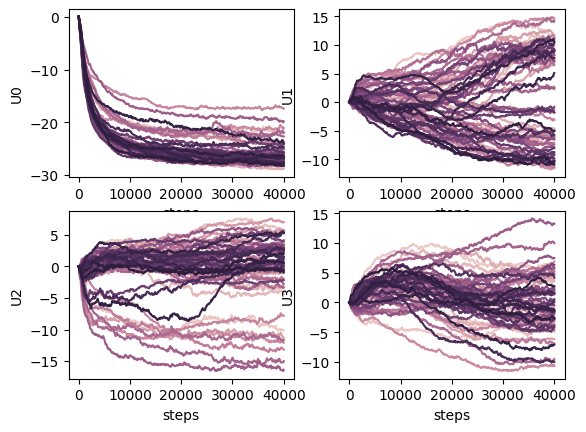

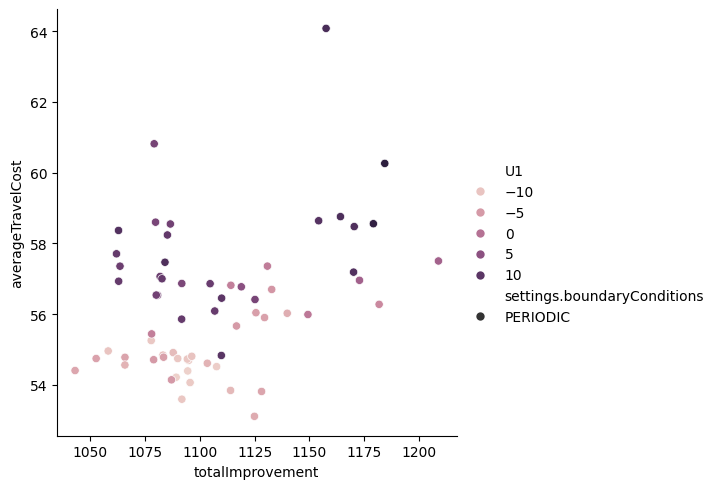

In [48]:
_slow = df[
    (df["settings.patchRecovery"] == 0.0005) &
    # (df["ratio"] == 100.0) &
    (df["settings.numLocations"] == 10) &
    (df["settings.randomSeedLocations"] == 1) &
    (df["settings.boundaryConditions"] == "PERIODIC") &
    (df["settings.recoveryLogic"] == "LINEAR")
].copy()

Us, Ss, Vhs = util.svd(_slow, 40000, dynamics=True)

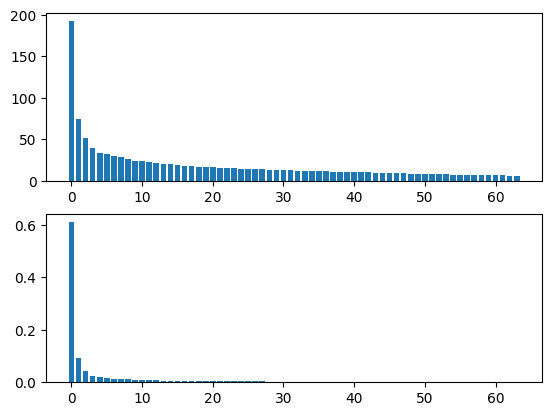

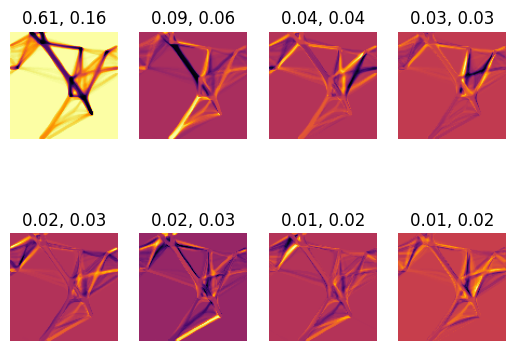

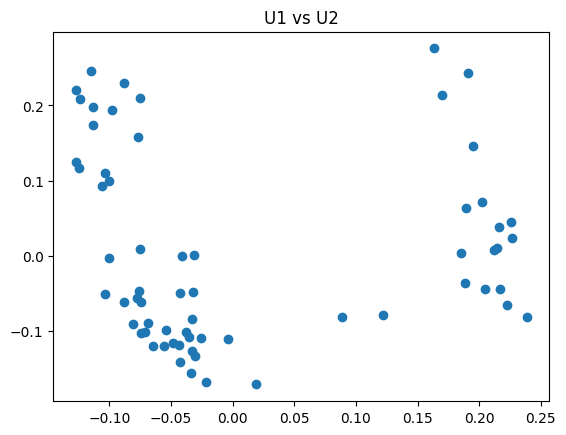

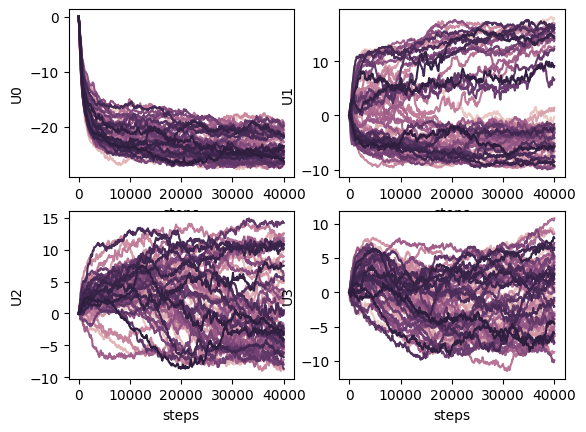

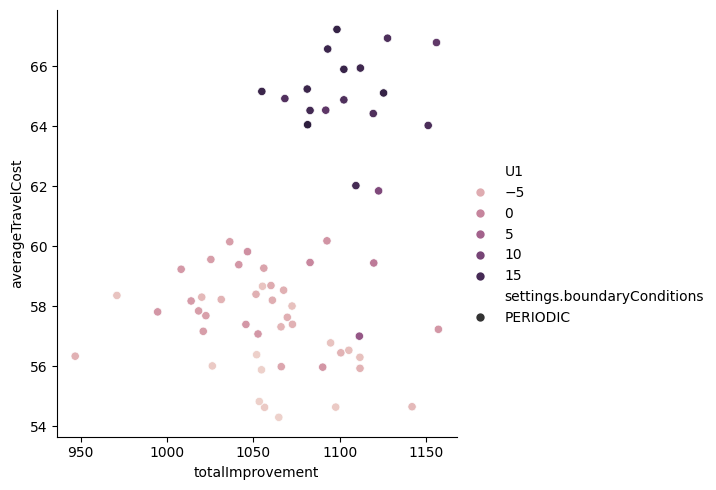

In [50]:
_fast = df[
    (df["settings.patchRecovery"] == 0.001) &
    # (df["ratio"] == 100.0) &
    (df["settings.numLocations"] == 10) &
    (df["settings.randomSeedLocations"] == 1) &
    (df["settings.boundaryConditions"] == "PERIODIC") &
    (df["settings.recoveryLogic"] == "LINEAR")
].copy()

Uf, Sf, Vhf = util.svd(_fast, 40000, dynamics=True)

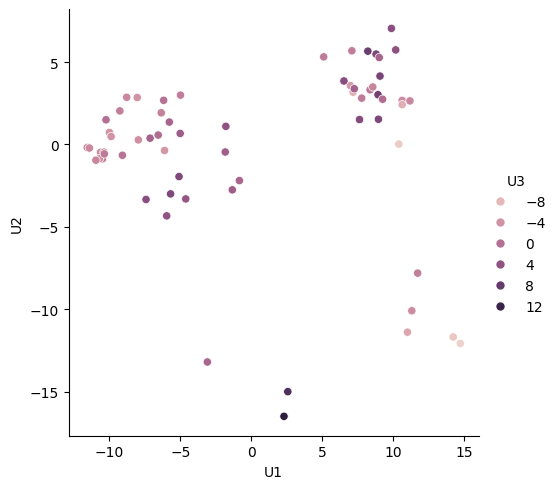

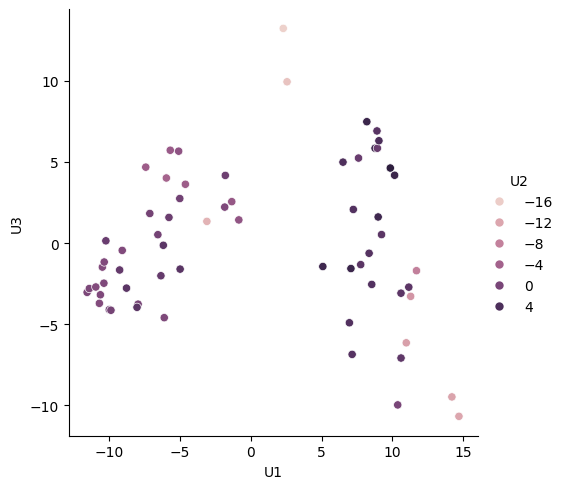

In [59]:
# fig, axs = plt.subplots(1, 2)
sns.relplot(data=_slow[_slow["steps"] == 40000], x="U1", y="U2", hue="U3")
plt.show()
sns.relplot(data=_slow[_slow["steps"] == 40000], x="U1", y="U3", hue="U2")

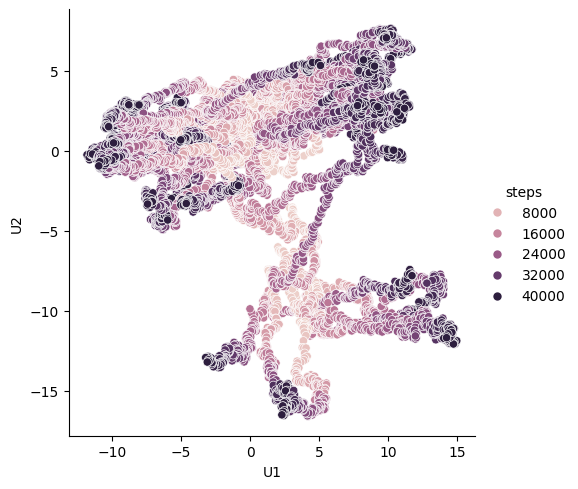

In [60]:
sns.relplot(data=_slow[_slow["steps"] >= 3000], x="U1", y="U2", hue="steps")

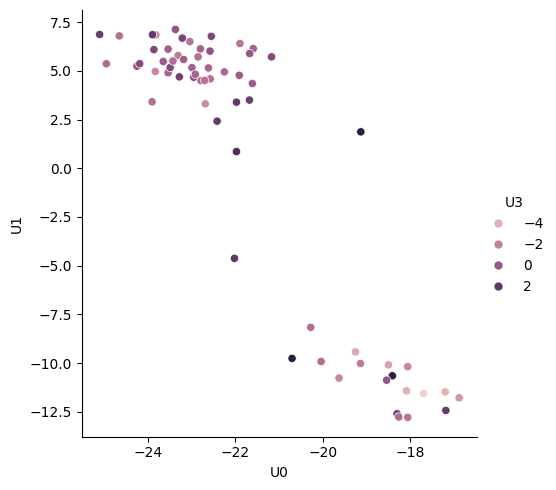

In [52]:
sns.relplot(data=_all[_all["steps"] == 40000], x="U0", y="U1", hue="U3")

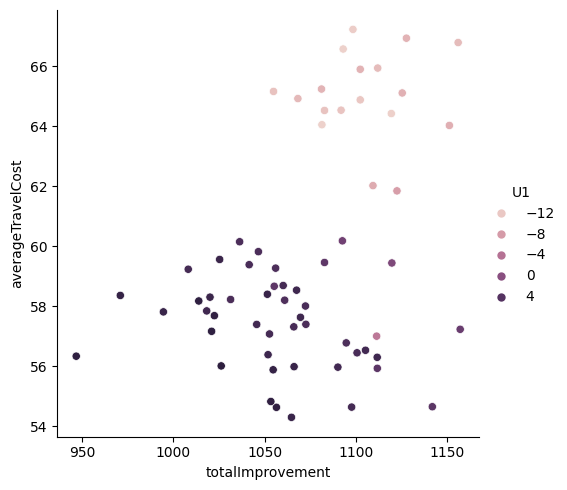

In [40]:
sns.relplot(data=_all[_all["steps"] == 40000], x="totalImprovement", y="averageTravelCost", hue="U1")